In [1]:
import sys
# sys.path
# sys.path[5] = "C:\\ProgramData\\Anaconda3\\envs\\geoplot\\Lib\\site-packages"

import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import geopandas as gpd
from osgeo import gdal
import pandas as pd
import xarray as xr
import rioxarray
from easy_mpl import taylor_plot
from matplotlib.patches import Patch
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import copy
from matplotlib.colors import ListedColormap, BoundaryNorm
import xarray as xr
import rioxarray

from matplotlib.lines import Line2D
# import rasterio
#PlateCarree EqualEarth()
import warnings
import matplotlib.patches as patches
import seaborn as sb
import matplotlib.ticker as ticker

In [2]:
def draw_hist(ax, array, bins, ran, cmap):
    input_array = array.reshape(-1)

    N, bins, patches = ax.hist(input_array, bins=bins, range=ran, edgecolor='black', density=True, linewidth=0.2)
    
    # ax.axes.xaxis.set_ticks([])
    # ax.axes.yaxis.set_ticks([]) 
    
    # ax.set_xticks([0, 0.25, 0.5, 0.75, 1], ["100%", "population", "Equal", "Probability", "100%"], rotation=90, fontsize=4)
    ax.set_facecolor("none")
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False)  
    # ax.spines['left'].set_visible(False)
    ax.spines["bottom"].set_linewidth("0.5")
    ax.spines["left"].set_linewidth("0.5")
    ax.margins(0, 0)
    ax.tick_params("x",which="major",
               length=2,width = 0.2,
               colors = "0.25")

    
    
    ax.tick_params("y",which="major",
               length=2,width = 0.2,
               colors = "0.25")
    formatter = ticker.FormatStrFormatter("%1.2f")
    ax.yaxis.set_major_formatter(formatter)
    # formatter = ticker.FormatStrFormatter("%1.1f")
    # ax.yaxis.set_major_formatter(formatter)
    
    cm = plt.get_cmap(cmap)
    for i in range(len(patches)):
        color = cm(1.*i/len(patches))  
        patches[i].set_facecolor(color)
    ax.tick_params("x",which="major",
               length=1.34,width = 0.8,
               colors = "0.25", pad=-0.01, labelsize=4.5)
    ax.tick_params("y",which="major",
                   length=1.34,width = 0.8,
                   colors = "0.25", pad=-0.01, labelsize=4.5)

In [3]:
def get_geotiff_data(path):
    """
    get gdal raster data
    """
    ds = gdal.Open(path)
    gt = ds.GetGeoTransform()
    array = ds.ReadAsArray()
    array = array[:75, :]
    
    xsize = ds.RasterXSize
    ysize = ds.RasterYSize
    
    xres, yres = gt[1], gt[5]
    xcor, ycor = gt[0], gt[3]
    
    lat = np.arange(ycor+0.5*yres, ycor+0.5*yres + yres*ysize, yres)[:75]
    lon = np.arange(xcor+0.5*xres, xcor+0.5*xres + xres*xsize, xres)
    return lon, lat, array

In [4]:
def draw(ax1, title, lon, lat, array, vmin, vmax, levels, cmap, number, c_list=None, p_value=None):
    ax1.outline_patch.set_linewidth(0.3)
    #设置颜色属性
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    # array = array.astype(np.float32)
    # array[array==255] = np.nan
    if c_list is not None:
        cs = ax1.contourf(lon, lat, array, transform=ccrs.PlateCarree(), colors=c_list,levels=levels, norm=norm, shading='nearest')
    else:
        cs = ax1.contourf(lon, lat, array, transform=ccrs.PlateCarree(), cmap=cmap,levels=levels, norm=norm, shading='nearest')
    # cbar = fig.colorbar(cs, orientation='horizontal', pad=0.02, shrink=1, fraction=0.03, aspect=50)

    if p_value is not None:
        # significance
        p = p_value.plot.contourf(ax=ax1,transform=ccrs.PlateCarree(),levels=2, vmin=-1, vmax=0.2,  
                                  hatches=[None, '/////////'],colors="none",add_colorbar=False,
                                  zorder=3)

    ax1.coastlines(linewidth=0.2)

    # a = ax1.gridlines(draw_labels=True, linewidth=0.2)
    ax1.set_extent([-179.9999, 179.9999, -60, 90],ccrs.PlateCarree())
    ax1.text(
        0.0, 0.95, number,
        fontsize=8,
        fontweight="bold",
        transform = ax1.transAxes
    )

In [5]:
def draw_lat_plot(ax, lat, data, data2, data3):
    
    
    x = lat
    a = data.copy()

    zeros = np.zeros(x.shape)
    a = np.ma.masked_array(a,mask=(np.isnan(a)))

    
    mean_value = a.mean(axis=1)[::-1]
    std_value = a.std(axis=1)[::-1]
    ax.fill_betweenx(x, mean_value-0.5*std_value, mean_value+0.5*std_value, color="#23436C", alpha=0.2, linewidth=0.1)
    ax.plot(mean_value, x, color="#23436C", linewidth=0.8, alpha=0.7)

    a = data2.copy()

    zeros = np.zeros(x.shape)
    a = np.ma.masked_array(a,mask=(np.isnan(a)))

    
    mean_value = a.mean(axis=1)[::-1]
    std_value = a.std(axis=1)[::-1]
    ax.fill_betweenx(x, mean_value-0.5*std_value, mean_value+0.5*std_value, color="#F9922C", alpha=0.2, linewidth=0.1)
    ax.plot(mean_value, x, color="#F9922C", linewidth=0.8, alpha=0.7)

    a = data3.copy()

    zeros = np.zeros(x.shape)
    a = np.ma.masked_array(a,mask=(np.isnan(a)))

    
    mean_value = a.mean(axis=1)[::-1]
    std_value = a.std(axis=1)[::-1]
    ax.fill_betweenx(x, mean_value-0.5*std_value, mean_value+0.5*std_value, color="#FA4F3E", alpha=0.2, linewidth=0.1)
    ax.plot(mean_value, x, color="#FA4F3E", linewidth=0.8, alpha=0.7)
    ax.plot([0, 0], [-90, 90], linewidth=0.5, color="orange", linestyle="--")
    # ax.fill_betweenx(x, y2, color="#CFA256", linewidth=0)
    ax.margins(0, 0)
    # ax.set_xlim(0)
    # ax.plot([0, 0], [-90, 90], linewidth=0.5, color="orange", linestyle="--")
    ax.set_ylim(-60, 85)
    ax.set_xlim(0, 100)
    # ax.set_axisbelow(False)
    # ax.set_xlabel("Probability", fontsize=6)
    ax.set_ylabel("Latitude", labelpad=-1, fontsize=6)
    ax.set_yticks(np.arange(-40, 80.01, 20))
    
    ax.spines["bottom"].set_linewidth(0.3)
    ax.spines["top"].set_linewidth(0.3)
    ax.spines["left"].set_linewidth(0.3)
    ax.spines["right"].set_linewidth(0.3)
    
    ax.tick_params("x",which="major",
               length=1.34,width = 0.8,
               colors = "0.25", pad=-0.01, labelsize=5)
    ax.tick_params("y",which="major",
                   length=1.34,width = 0.8,
                   colors = "0.25", pad=-0.01, labelsize=5)
    ax.tick_params(which = "minor",
                   length = 1.34, width = 0.8,
                   labelsize=4,labelcolor = "0.25")
    # ax.set_xticks([0, 0.1])

In [6]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist = ["#fcde9c", "#faa476", "#f0746e", "#e34f6f", "#dc3977", "#b9257a", "#7c1d6f"]#sunset dark
clist4 = ["#8C510A", "#BF812D", "#DFC27D", "#F6E8C3", "#C7EAE5", "#80CDC1", "#35978F", "#01665E"]
sunsetD_newcmap = LinearSegmentedColormap.from_list('chaos',clist)

C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_17244\851337347.py:2: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax1.outline_patch.set_linewidth(0.3)


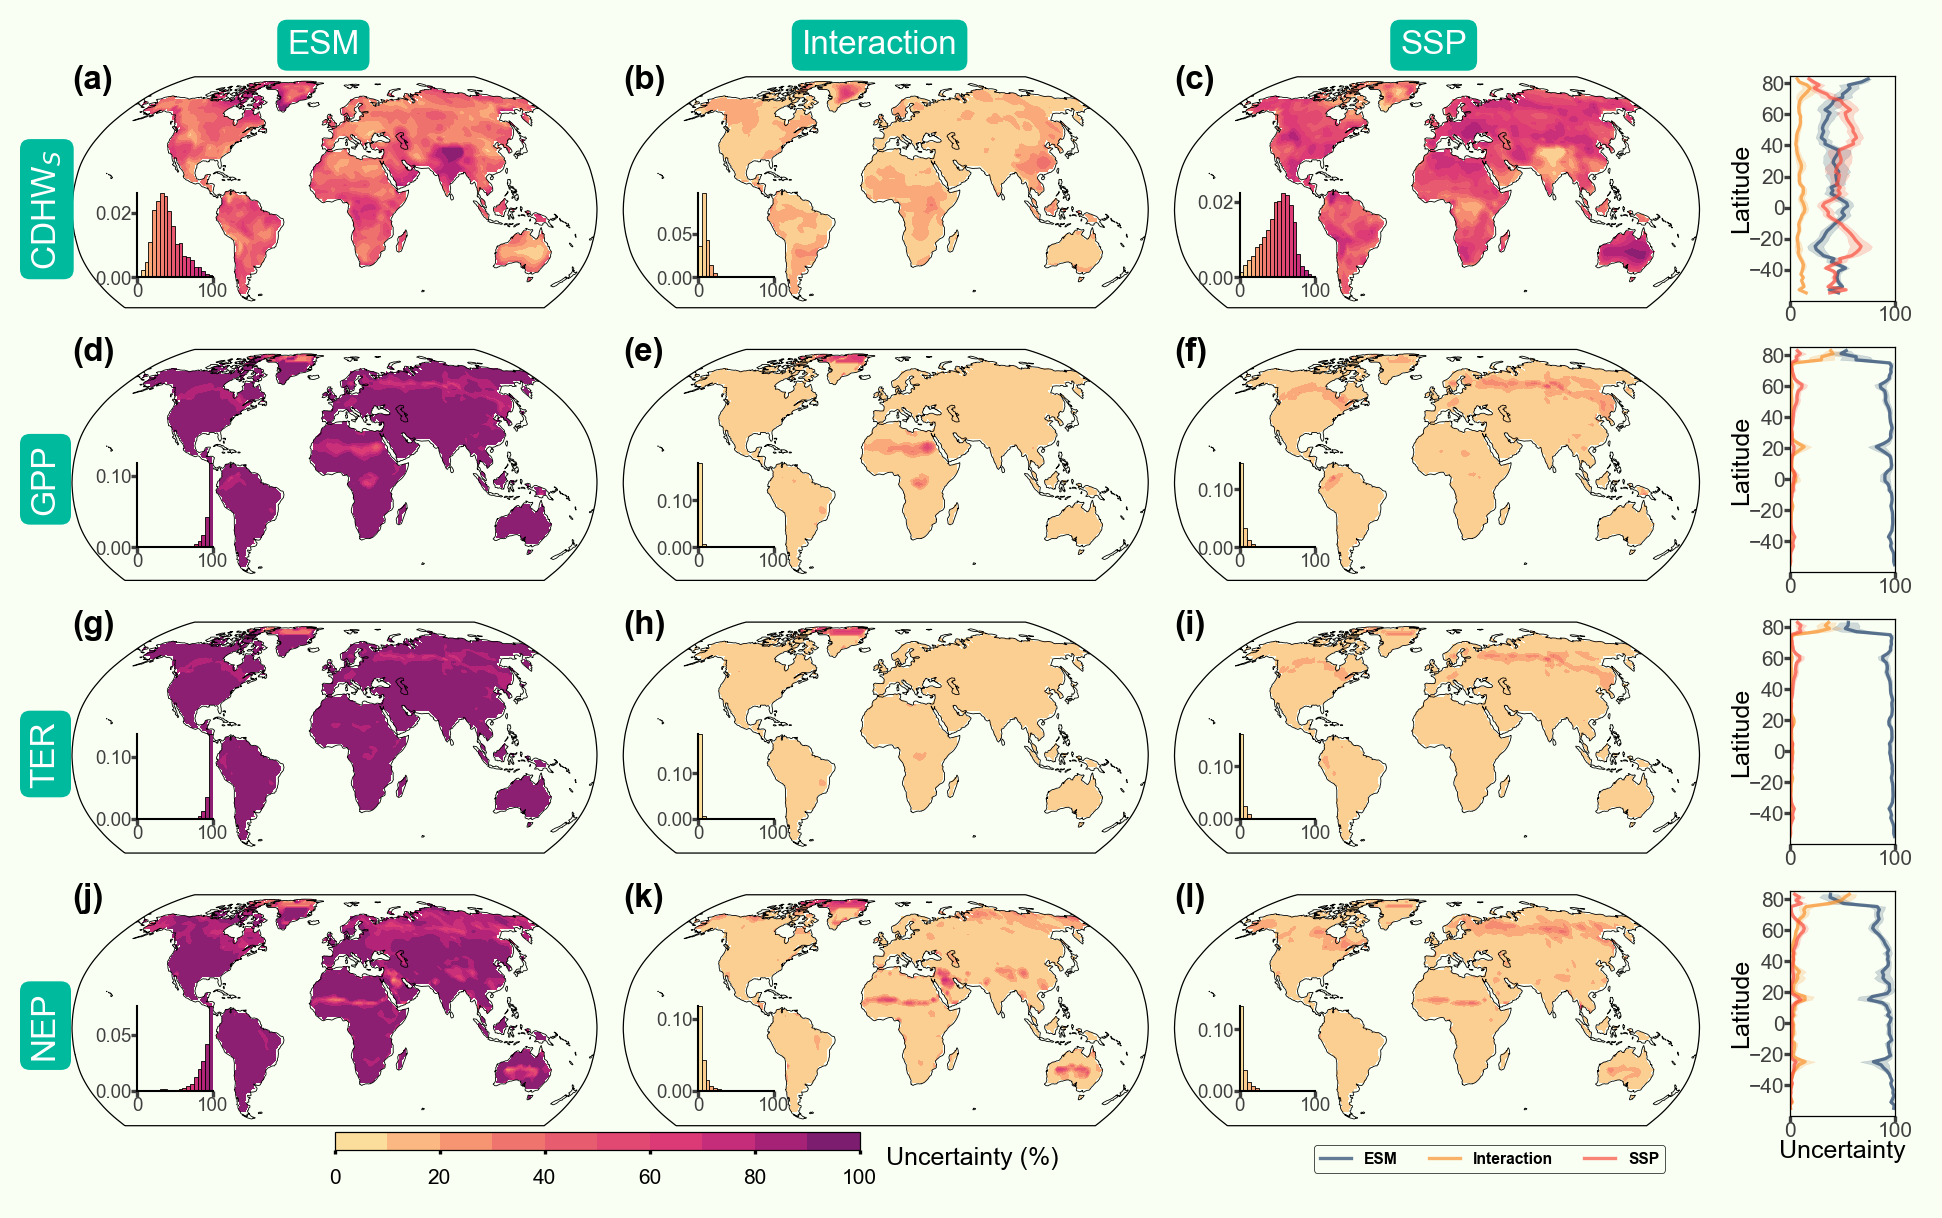

In [14]:
fig = plt.figure(figsize=(7,6), dpi=300)

mpl.rcParams['hatch.linewidth'] = 0.2
plt.rcParams["font.sans-serif"] = "Arial"
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({"font.size":8})
projection = ccrs.Robinson()

ax1 = fig.add_subplot(4, 3, 1,
                      projection=projection)
ref_arr = gdal.Open(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\output\warm_seasons_resampled\warm_season_mainland_2degree.tif").ReadAsArray()


lon, lat, array1 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\CDHW_ESM.tif")
array1 = array1 * 100
draw(ax1, '', lon, lat, array1, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(a)")

ax111 = plt.axes([0.156, 0.675, 0.036, 0.047])
draw_hist(ax111, array1, 20, (0, 100), sunsetD_newcmap)
# draw_proportion_chart(ax111, array1, np.arange(0, 100.1, 10), np.arange(0, 100.1, 10), sunsetD_newcmap, colors=clist4)
# gdf = gpd.read_file(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\Climate Reference regions\IPCC-WGI-reference-regions-v4_shapefile\IPCC-WGI-reference-regions-v4_land.shp")
# draw_vectors(ax1, gdf, projection, "Acronym")



ax2 = fig.add_subplot(4, 3, 2,
                      projection=projection)

lon, lat, array2 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\CDHW_Interaction.tif")
array2 = array2 * 100
# p_value = rioxarray.open_rasterio(r"G:\SPEI_calculation\corr\p_value_era5.tif")
# array2[array2!=0] = array2[array2!=0] + 0.0001
draw(ax2, '', lon, lat, array2, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(b)")


ax122 = plt.axes([0.4231, 0.675, 0.036, 0.047])
draw_hist(ax122, array2, 20, (0, 100), sunsetD_newcmap)
# draw_proportion_chart(ax122, array2, np.arange(0, 100.1, 10), np.arange(0, 100.1, 10), sunsetD_newcmap, colors=clist4)
# gdf = gpd.read_file(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\Climate Reference regions\IPCC-WGI-reference-regions-v4_shapefile\IPCC-WGI-reference-regions-v4_land.shp")
# draw_vectors(ax1, gdf, projection, "Acronym")

ax3 = fig.add_subplot(4, 3, 3,
                      projection=projection)

lon, lat, array3 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\CDHW_SSP.tif")
array3 = array3 * 100
# p_value = rioxarray.open_rasterio(r"G:\SPEI_calculation\corr\p_value_era5.tif")
draw(ax3, '', lon, lat, array3, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(c)")

ax123 = plt.axes([0.681, 0.675, 0.036, 0.047])
draw_hist(ax123, array3, 20, (0, 100), sunsetD_newcmap)
# draw_proportion_chart(ax123, array3, np.arange(0, 100.1, 10), np.arange(0, 100.1, 10), sunsetD_newcmap, colors=clist4)

ax11 = plt.axes([0.943, 0.662, 0.05, 0.125])
draw_lat_plot(ax11, lat[::-1], array1, array2, array3)

ax4 = fig.add_subplot(4, 3, 4,
                      projection=projection)

lon, lat, array4 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\GPP_ESM.tif")
array4 = array4 * 100
# p_value = rioxarray.open_rasterio(r"G:\SPEI_calculation\corr\p_value_era5.tif")
draw(ax4, '', lon, lat, array4, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(d)")

ax124 = plt.axes([0.156, 0.525, 0.036, 0.047])
draw_hist(ax124, array4, 20, (0, 100), sunsetD_newcmap)
# draw_proportion_chart(ax124, array4, np.arange(0, 100.1, 10), np.arange(0, 100.1, 10), sunsetD_newcmap, colors=clist4)

ax5 = fig.add_subplot(4, 3, 5,
                      projection=projection)

lon, lat, array5 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\GPP_Interaction.tif")
array5 = array5 * 100
# p_value = rioxarray.open_rasterio(r"G:\SPEI_calculation\corr\p_value_era5.tif")
draw(ax5, '', lon, lat, array5, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(e)")

ax125 = plt.axes([0.4231, 0.525, 0.036, 0.047])
draw_hist(ax125, array5, 20, (0, 100), sunsetD_newcmap)
# draw_proportion_chart(ax125, array5, np.arange(0, 100.1, 10), np.arange(0, 100.1, 10), sunsetD_newcmap, colors=clist4)

ax6 = fig.add_subplot(4, 3, 6,
                      projection=projection)

lon, lat, array6 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\GPP_SSP_2.tif.tif")
array6 = array6 * 100
# array6 = array6 * 1.01
# array6[array6!=0] = array6[array6!=0] * 1.1
# p_value = rioxarray.open_rasterio(r"G:\SPEI_calculation\corr\p_value_era5.tif")
draw(ax6, '', lon, lat, array6, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(f)")



ax126 = plt.axes([0.681, 0.525, 0.036, 0.047])
draw_hist(ax126, array6, 20, (0, 100), sunsetD_newcmap)
# draw_proportion_chart(ax126, array6, np.arange(0, 100.1, 10), np.arange(0, 100.1, 10), sunsetD_newcmap, colors=clist4)

ax22 = plt.axes([0.943, 0.511, 0.05, 0.125])
draw_lat_plot(ax22, lat[::-1], array4, array5, array6)

ax7 = fig.add_subplot(4, 3, 7,
                      projection=projection)

lon, lat, array7 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\ter_ESM.tif")
array7 = array7 * 100
# p_value = rioxarray.open_rasterio(r"G:\SPEI_calculation\corr\p_value_era5.tif")
draw(ax7, '', lon, lat, array7, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(g)")

ax127 = plt.axes([0.156, 0.374, 0.036, 0.047])
draw_hist(ax127, array7, 20, (0, 100), sunsetD_newcmap)
# draw_proportion_chart(ax127, array7, np.arange(0, 100.1, 10), np.arange(0, 100.1, 10), sunsetD_newcmap, colors=clist4)

ax8 = fig.add_subplot(4, 3, 8,
                      projection=projection)

lon, lat, array8 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\ter_Interaction.tif")
array8 = array8 * 100
# p_value = rioxarray.open_rasterio(r"G:\SPEI_calculation\corr\p_value_era5.tif")
draw(ax8, '', lon, lat, array8, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(h)")

ax128 = plt.axes([0.4231, 0.374, 0.036, 0.047])
draw_hist(ax128, array8, 20, (0, 100), sunsetD_newcmap)
# draw_proportion_chart(ax128, array8, np.arange(0, 100.1, 10), np.arange(0, 100.1, 10), sunsetD_newcmap, colors=clist4)
fig.subplots_adjust(hspace=-0.3, wspace=0.05)

ax9 = fig.add_subplot(4, 3, 9,
                      projection=projection)

lon, lat, array9 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\ter_SSP.tif")
array9 = array9 * 100
# p_value = rioxarray.open_rasterio(r"G:\SPEI_calculation\corr\p_value_era5.tif")
draw(ax9, '', lon, lat, array9, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(i)")

ax129 = plt.axes([0.681, 0.374, 0.036, 0.047])
draw_hist(ax129, array9, 20, (0, 100), sunsetD_newcmap)
# draw_proportion_chart(ax129, array9, np.arange(0, 100.1, 10), np.arange(0, 100.1, 10), sunsetD_newcmap, colors=clist4)
ax33 = plt.axes([0.943, 0.36, 0.05, 0.125])
draw_lat_plot(ax33, lat[::-1], array7, array8, array9)

ax10 = fig.add_subplot(4, 3, 10,
                      projection=projection)

lon, lat, array10 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\nep_ESM.tif")
array10 = array10 * 100
# p_value = rioxarray.open_rasterio(r"G:\SPEI_calculation\corr\p_value_era5.tif")
draw(ax10, '', lon, lat, array10, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(j)")
ax1210 = plt.axes([0.156, 0.223, 0.036, 0.047])
draw_hist(ax1210, array10, 20, (0, 100), sunsetD_newcmap)
ax13 = fig.add_subplot(4, 3, 11,
                      projection=projection)

lon, lat, array11 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\nep_Interaction.tif")
array11 = array11 * 100
# p_value = rioxarray.open_rasterio(r"G:\SPEI_calculation\corr\p_value_era5.tif")
draw(ax13, '', lon, lat, array11, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(k)")
ax1211 = plt.axes([0.4231, 0.223, 0.036, 0.047])
draw_hist(ax1211, array11, 20, (0, 100), sunsetD_newcmap)

ax12 = fig.add_subplot(4, 3, 12,
                      projection=projection)

lon, lat, array12 = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\nep_SSP.tif")
array12 = array12 * 100
# p_value = rioxarray.open_rasterio(r"G:\SPEI_calculation\corr\p_value_era5.tif")
draw(ax12, '', lon, lat, array12, vmin=0, vmax=100, levels=np.arange(0, 100.1, 10), cmap=sunsetD_newcmap, number="(l)")
ax1212 = plt.axes([0.681, 0.223, 0.036, 0.047])
draw_hist(ax1212, array12, 20, (0, 100), sunsetD_newcmap)
ax44 = plt.axes([0.943, 0.209, 0.05, 0.125])
draw_lat_plot(ax44, lat[::-1], array10, array11, array12)

fig.subplots_adjust(hspace=-0.52, wspace=0.05)
fig.patch.set_facecolor('#F9FFF3')

ax11.set_facecolor('#F9FFF3')
ax22.set_facecolor('#F9FFF3')
ax33.set_facecolor('#F9FFF3')
ax44.set_facecolor('#F9FFF3')
#legend
ax44.set_xlabel("Uncertainty", fontsize=6, labelpad=-0.3)

custom_lines = [Line2D([0], [0], color="#23436C", lw=0.8, alpha=0.7, label="ESM"),
                Line2D([0], [0], color="#F9922C", lw=0.8, alpha=0.7, label="Interaction"),
                Line2D([0], [0], color="#FA4F3E", lw=0.8, alpha=0.7, label="SSP")]
leg = ax13.legend(prop={"size": 3.75, "weight": "bold"}, fontsize=8, handles=custom_lines, bbox_to_anchor=(2, -0.05), edgecolor='k', ncol=3, facecolor="#F9FFF3")
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.2)

# adding some elements about scenarios and periods
props = dict(boxstyle='round', facecolor='#00BA9E', alpha=1, edgecolor="none")
ax1.text(
        0.41, 1.1, "ESM",
        color="white",
        fontsize=8,
        transform = ax1.transAxes,
        bbox=props
    
    )
ax2.text(
        0.34, 1.1, "Interaction",
    color="white",
        fontsize=8,
        transform = ax2.transAxes,
        bbox=props
    )
ax3.text(
        0.43, 1.1, "SSP",
    color="white",
        fontsize=8,
        transform = ax3.transAxes,
    bbox=props
    )
ax1.text(
        -0.08, 0.2, "CDHW$_{S}$",
    color="white",
        fontsize=8,
        rotation=90,
        transform = ax1.transAxes,
    bbox=props
    )
ax4.text(
        -0.08, 0.315, "GPP",
    color="white",
        fontsize=8,
        rotation=90,
        transform = ax4.transAxes,
    bbox=props
    )
ax7.text(
        -0.08, 0.315, "TER",
    color="white",
        fontsize=8,
        rotation=90,
        transform = ax7.transAxes,
    bbox=props
    )
ax10.text(
        -0.08, 0.315, "NEP",
    color="white",
        fontsize=8,
        rotation=90,
        transform = ax10.transAxes,
    bbox=props
    )
# rect = patches.Rectangle((-0.02, -0.05), 1.04, 3.5, fill="#23436C", color="#23436C", alpha=0.1, linewidth=0, zorder=-1, transform=ax7.transAxes)
# fig.add_artist(rect)
# rect = patches.Rectangle((1.032, -0.05), 1.04, 3.5, fill="#F9922C", color="#F9922C", alpha=0.1, linewidth=0, zorder=-1, transform=ax7.transAxes)
# fig.add_artist(rect)
# rect = patches.Rectangle((2.083, -0.05), 1.04, 3.5, fill="#FA4F3E", color="#FA4F3E", alpha=0.1, linewidth=0, zorder=-1, transform=ax7.transAxes)
# fig.add_artist(rect)
# colorbar
bounds = np.arange(0, 100.1, 10)
ax999 = plt.axes([0.25, 0.19, 0.25, 0.01])
my_norm = BoundaryNorm(bounds, sunsetD_newcmap.N)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=my_norm, cmap=sunsetD_newcmap), cax=ax999, orientation="horizontal", ticks=[0, 20, 40, 60, 80, 100])
cbar.ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=5)
cbar.ax.tick_params(size=1)
cbar.outline.set_linewidth(0.5)
ax999.text(
        1.05, -0.8, "Uncertainty (%)",
        fontsize=6,
        transform = ax999.transAxes
    )
cbar.outline.set_linewidth(0.3)

ax1.set_facecolor('#F9FFF3')
ax2.set_facecolor('#F9FFF3')
ax3.set_facecolor('#F9FFF3')
ax4.set_facecolor('#F9FFF3')
ax5.set_facecolor('#F9FFF3')
ax6.set_facecolor('#F9FFF3')
ax7.set_facecolor('#F9FFF3')
ax8.set_facecolor('#F9FFF3')
ax9.set_facecolor('#F9FFF3')
ax10.set_facecolor('#F9FFF3')
ax13.set_facecolor('#F9FFF3')
ax12.set_facecolor('#F9FFF3')
plt.savefig(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\figs\CMIP6_uncertainty.jpg", dpi=300, bbox_inches="tight")

In [17]:
# distribution chart
# ESM data
ESM_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\CDHW_ESM.tif")[2].reshape(-1)
Interaction_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\CDHW_Interaction.tif")[2].reshape(-1)
Interaction_global =Interaction_global_2sigma[~np.isnan(Interaction_global_2sigma)]
ESM_global =ESM_global_2sigma[~np.isnan(ESM_global_2sigma)]
# SSP data
SSP_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\CDHW_SSP.tif")[2].reshape(-1)
SSP_global =SSP_global_2sigma[~np.isnan(SSP_global_2sigma)]

df_global = pd.DataFrame(columns=["Group", "value"])
df_global["value"] = ESM_global
df_global["Group"] = ["ESM"] * ESM_global.shape[0]
df_global_Interaction = pd.DataFrame(columns=["Group", "value"])
df_global_Interaction["value"] = Interaction_global
df_global_Interaction["Group"] = ["Interaction"] * Interaction_global.shape[0]
df_global_SSP = pd.DataFrame(columns=["Group", "value"])
df_global_SSP["value"] = SSP_global
df_global_SSP["Group"] = ["SSP"] * SSP_global.shape[0]
data_global = pd.concat((df_global, df_global_Interaction, df_global_SSP), axis=0)
data_global["loc"] = ["Global"] * len(data_global)

ESM_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\GPP_ESM.tif")[2].reshape(-1)
Interaction_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\GPP_Interaction.tif")[2].reshape(-1)
Interaction_global =Interaction_global_2sigma[~np.isnan(Interaction_global_2sigma)]
ESM_global =ESM_global_2sigma[~np.isnan(ESM_global_2sigma)]
# SSP data
SSP_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\GPP_SSP_2.tif.tif")[2].reshape(-1)
SSP_global =SSP_global_2sigma[~np.isnan(SSP_global_2sigma)]

df_global = pd.DataFrame(columns=["Group", "value"])
df_global["value"] = ESM_global
df_global["Group"] = ["ESM"] * ESM_global.shape[0]
df_global_Interaction = pd.DataFrame(columns=["Group", "value"])
df_global_Interaction["value"] = Interaction_global
df_global_Interaction["Group"] = ["Interaction"] * Interaction_global.shape[0]
df_global_SSP = pd.DataFrame(columns=["Group", "value"])
df_global_SSP["value"] = SSP_global
df_global_SSP["Group"] = ["SSP"] * SSP_global.shape[0]
data_global_GPP = pd.concat((df_global, df_global_Interaction, df_global_SSP), axis=0)
data_global_GPP["loc"] = ["Global"] * len(data_global_GPP)

ESM_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\ter_ESM.tif")[2].reshape(-1)
Interaction_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\ter_Interaction.tif")[2].reshape(-1)
Interaction_global =Interaction_global_2sigma[~np.isnan(Interaction_global_2sigma)]
ESM_global =ESM_global_2sigma[~np.isnan(ESM_global_2sigma)]
# SSP data
SSP_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\ter_SSP.tif")[2].reshape(-1)
SSP_global =SSP_global_2sigma[~np.isnan(SSP_global_2sigma)]

df_global = pd.DataFrame(columns=["Group", "value"])
df_global["value"] = ESM_global
df_global["Group"] = ["ESM"] * ESM_global.shape[0]
df_global_Interaction = pd.DataFrame(columns=["Group", "value"])
df_global_Interaction["value"] = Interaction_global
df_global_Interaction["Group"] = ["Interaction"] * Interaction_global.shape[0]
df_global_SSP = pd.DataFrame(columns=["Group", "value"])
df_global_SSP["value"] = SSP_global
df_global_SSP["Group"] = ["SSP"] * SSP_global.shape[0]
data_global_TER = pd.concat((df_global, df_global_Interaction, df_global_SSP), axis=0)
data_global_TER["loc"] = ["Global"] * len(data_global_TER)

ESM_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\nep_ESM.tif")[2].reshape(-1)
interaction_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\nep_Interaction.tif")[2].reshape(-1)
interaction_global =interaction_global_2sigma[~np.isnan(interaction_global_2sigma)]
ESM_global =ESM_global_2sigma[~np.isnan(ESM_global_2sigma)]
# SSP data
SSP_global_2sigma = get_geotiff_data(r"K:\CMIP6_eco\uncertainty_analysis\nep_SSP.tif")[2].reshape(-1)
SSP_global =SSP_global_2sigma[~np.isnan(SSP_global_2sigma)]

df_global = pd.DataFrame(columns=["Group", "value"])
df_global["value"] = ESM_global
df_global["Group"] = ["ESM"] * ESM_global.shape[0]
df_global_interaction = pd.DataFrame(columns=["Group", "value"])
df_global_interaction["value"] = interaction_global
df_global_interaction["Group"] = ["interaction"] * interaction_global.shape[0]
df_global_SSP = pd.DataFrame(columns=["Group", "value"])
df_global_SSP["value"] = SSP_global
df_global_SSP["Group"] = ["SSP"] * SSP_global.shape[0]
data_global_NEP = pd.concat((df_global, df_global_interaction, df_global_SSP), axis=0)
data_global_NEP["loc"] = ["Global"] * len(data_global_NEP)




In [18]:
#rainclouds
import ptitprince as pt
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_17244\3384184637.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "0", "50", "100"])
C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_17244\3384184637.py:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["", "0", "50", "100"])
C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_17244\3384184637.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(["", "0", "50", "100"])
C:\Users\Bohao Li\AppData\Local\Temp\ipykernel_17244\3384184637.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(["", "0", "50", "100"])


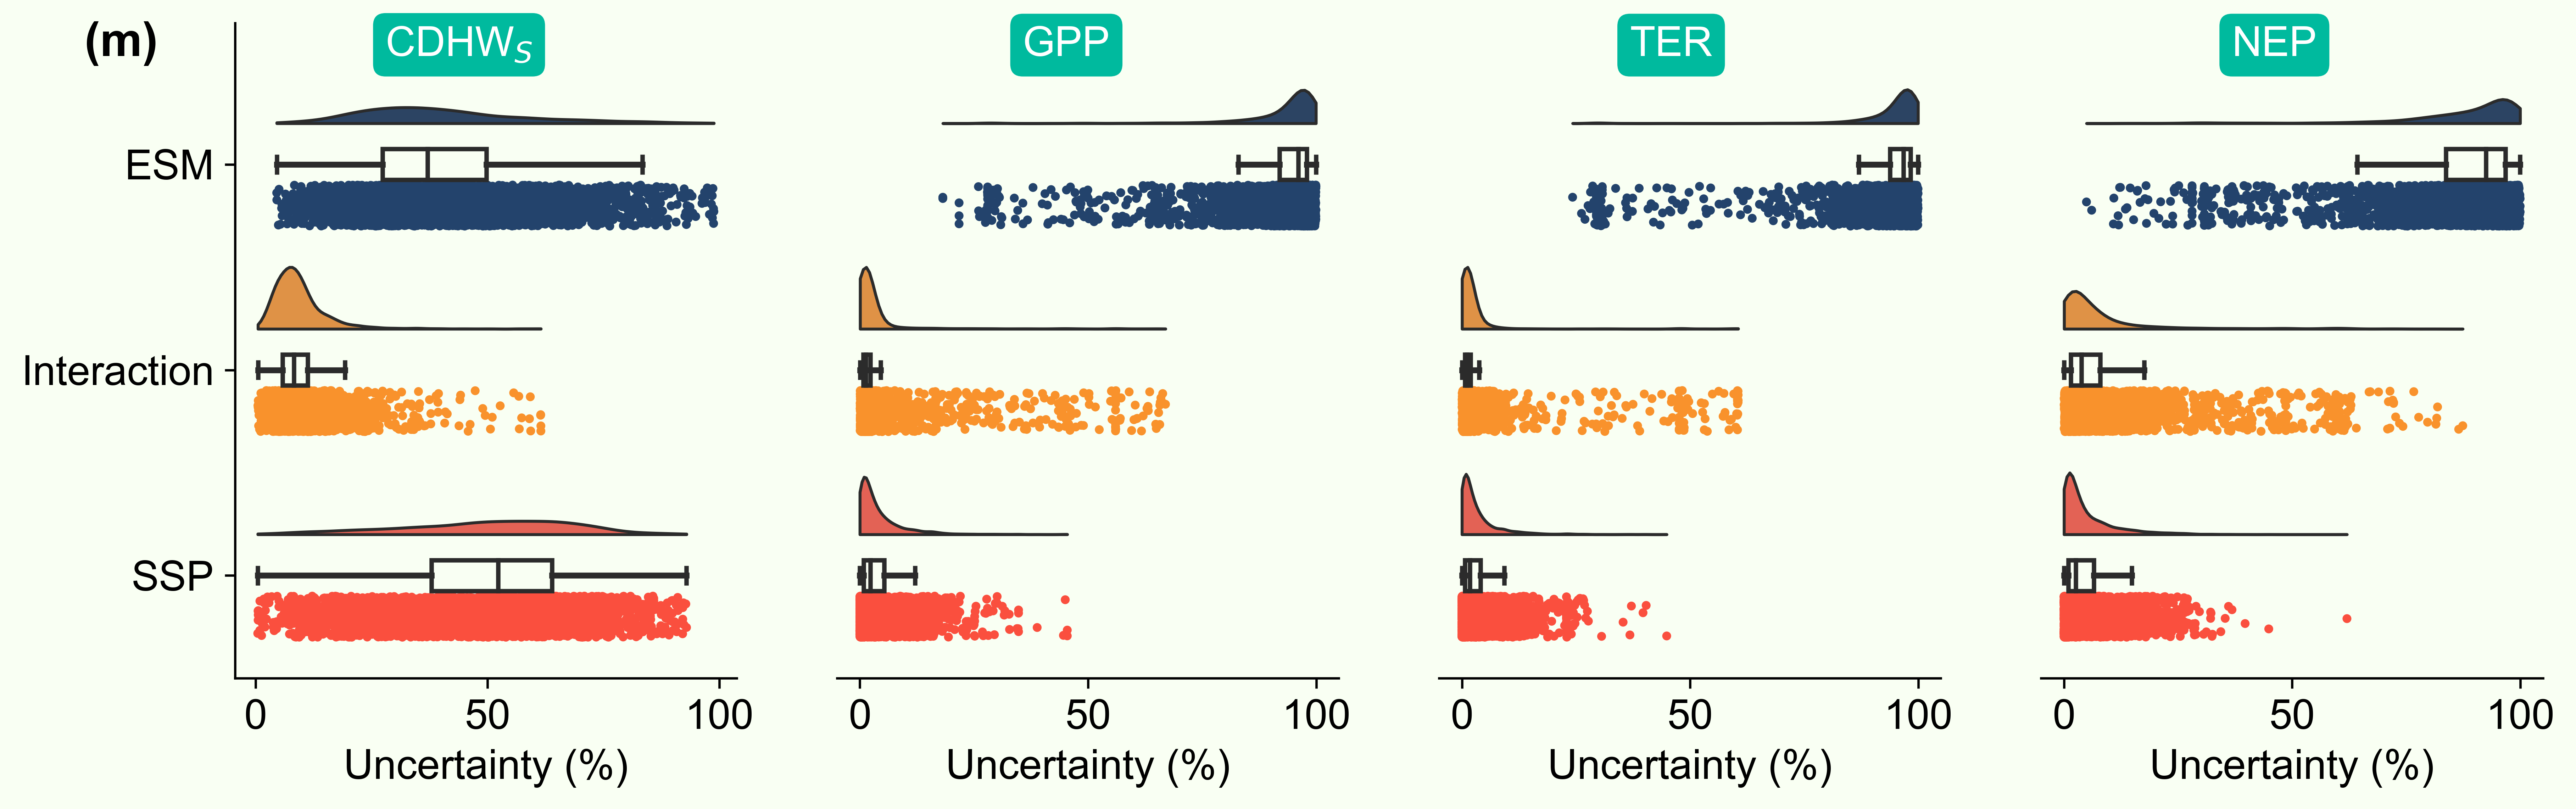

In [20]:
mpl.rcParams['hatch.linewidth'] = 0.2
plt.rcParams["font.sans-serif"] = "Arial"
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({"font.size":14})
fig = plt.figure(figsize=(14,4), dpi=600)
ax = fig.add_subplot(1, 4, 1)
dx="Group"; dy="value"; ort="h"; pal=["#23436C", "#F9922C" ,"#FA4F3E"]; sigma=.2
ax=pt.RainCloud(x=dx, y=dy, data=data_global, palette=pal, bw=sigma,
                 width_viol=.6, ax=ax, orient=ort, move=.2, box_showfliers= False, box_whis=1.5)
# ax.vlines(x=0, ymin=-100, ymax=100, color='r', linewidth=1, linestyle="--", alpha=0.7)
ax.set_xlabel("Uncertainty (%)")
ax.set_ylabel("")

ax2 = fig.add_subplot(1, 4, 2)
dx="Group"; dy="value"; ort="h"; pal=["#23436C", "#F9922C" ,"#FA4F3E"]; sigma=.2
ax2=pt.RainCloud(x=dx, y=dy, data=data_global_GPP, palette=pal, bw=sigma,
                 width_viol=.6, ax=ax2, orient=ort, move=.2, box_showfliers= False, box_whis=1.5)
# ax2.vlines(x=0, ymin=-100, ymax=100, color='r', linewidth=1, linestyle="--", alpha=0.7)
ax2.set_xlabel("Uncertainty (%)")
ax2.set_ylabel("")

ax3 = fig.add_subplot(1, 4, 3)
dx="Group"; dy="value"; ort="h"; pal=["#23436C", "#F9922C" ,"#FA4F3E"]; sigma=.2
ax3=pt.RainCloud(x=dx, y=dy, data=data_global_TER, palette=pal, bw=sigma,
                 width_viol=.6, ax=ax3, orient=ort, move=.2, box_showfliers= False, box_whis=1.5)
# ax3.vlines(x=0, ymin=-100, ymax=100, color='r', linewidth=1, linestyle="--", alpha=0.7)
ax3.set_xlabel("Uncertainty (%)")
ax3.set_ylabel("")

ax4 = fig.add_subplot(1, 4, 4)
dx="Group"; dy="value"; ort="h"; pal=["#23436C", "#F9922C" ,"#FA4F3E"]; sigma=.2
ax4=pt.RainCloud(x=dx, y=dy, data=data_global_NEP, palette=pal, bw=sigma,
                 width_viol=.6, ax=ax4, orient=ort, move=.2, box_showfliers= False, box_whis=1.5)
# ax3.vlines(x=0, ymin=-100, ymax=100, color='r', linewidth=1, linestyle="--", alpha=0.7)
ax4.set_xlabel("Uncertainty (%)")
ax4.set_ylabel("")


ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.spines['top'].set_visible(False)  
ax2.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False) 
ax3.spines['top'].set_visible(False)  
ax3.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False) 
ax4.spines['top'].set_visible(False)  
ax4.spines['right'].set_visible(False)
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])
fig.patch.set_facecolor('#F9FFF3')
ax.set_facecolor('#F9FFF3')
ax2.set_facecolor('#F9FFF3')
ax3.set_facecolor('#F9FFF3')
ax4.set_facecolor('#F9FFF3')
props = dict(boxstyle='round', facecolor='#00BA9E', alpha=1, edgecolor="none")
ax.text(
        0.3, 0.95, "CDHW$_{S}$",
        color="white",
        fontsize=14,
        transform = ax.transAxes,
        bbox=props
    
    )
ax2.text(
        0.37, 0.95, "GPP",
        color="white",
        fontsize=14,
        transform = ax2.transAxes,
        bbox=props
    
    )
ax3.text(
        0.38, 0.95, "TER",
        color="white",
        fontsize=14,
        transform = ax3.transAxes,
        bbox=props
    
    )
ax4.text(
        0.38, 0.95, "NEP",
        color="white",
        fontsize=14,
        transform = ax4.transAxes,
        bbox=props
    
    )
ax.set_xticklabels(["", "0", "50", "100"])
ax2.set_xticklabels(["", "0", "50", "100"])
ax3.set_xticklabels(["", "0", "50", "100"])
ax4.set_xticklabels(["", "0", "50", "100"])
ax.text(-0.3, 0.95, "(m)", fontsize=16, fontweight="bold", transform=ax.transAxes)
plt.savefig(r"E:\l3\创纪录极端复合干旱热浪事件影响生态系统生产力\figs\CMIP6_uncertainty_global.jpg", dpi=600, bbox_inches="tight")